# NOTE: This homework is WRONG!!!! See homework_9 for a right MCMC code!!!

## 2D multivariable normal distribution

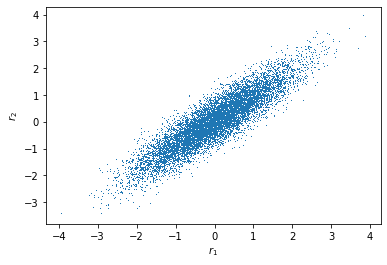

In [1]:
import numpy as np
import matplotlib.pyplot as plt

mean = [0, 0]
variance = [[1.0, 0.9], [0.9, 1.0]]
r1, r2 = np.random.multivariate_normal(mean, variance, int(1e4)).T

plt.plot(r1, r2, ',')
plt.xlabel('$r_1$')
plt.ylabel('$r_2$')
plt.show()


## Transform the distribution

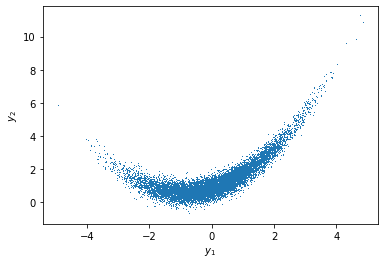

In [2]:
a = 1.25
b = 0.5

y1 = a*r1
y2 = r2/a + b*(r1**2+a**2)

plt.plot(y1, y2, ',')
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.show()


## Apply the Markov Chain Monte Carlo (MCMC) sampling

C:\Users\wangk\AppData\Local\Temp/ipykernel_11772/3118409306.py:40: RuntimeWarning: invalid value encountered in double_scalars
  accept_prob_y1 = min(1, (fb/fa))
C:\Users\wangk\AppData\Local\Temp/ipykernel_11772/3118409306.py:41: RuntimeWarning: invalid value encountered in double_scalars
  accept_prob_y2 = min(1, (fb/fa))
C:\Users\wangk\AppData\Local\Temp/ipykernel_11772/3118409306.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  accept_prob_y1 = min(1, (fb/fa))
C:\Users\wangk\AppData\Local\Temp/ipykernel_11772/3118409306.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  accept_prob_y2 = min(1, (fb/fa))


0.2312   0.2308


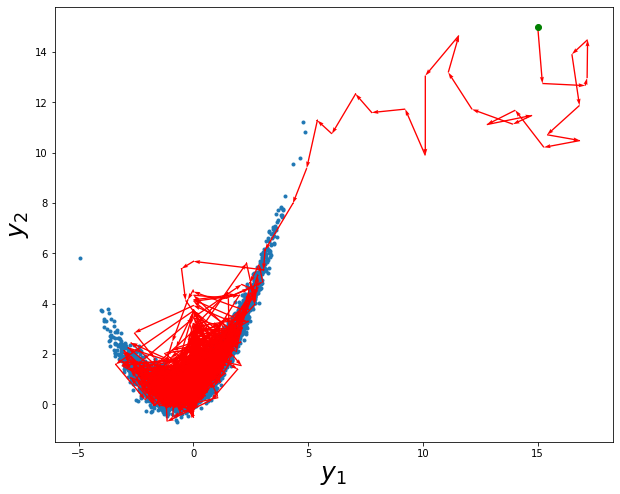

In [9]:
# K_q is the covariance matrix

a_ = 1.6
K_q = np.array([[a_, 0], [0, a_]])

''' 
Define the f(x), where p(x) = (f(x) / (Normal constant)) is the desired density function of y variables
'''
def fx(y1, y2):
    e1 = np.array([y1/a, a*y2-(b/a)*(y1**2)-(a**3)*b])
    e2 = np.linalg.inv(np.array([[1.0, 0.9], [0.9, 1.0]]))
    e3 = e1.T
    fx = np.exp((-1/2)*(e1@e2@e3))
    return fx

ite = int(1e4)
y = np.zeros((2, ite))

# Define the start point for Markov Chain
y[:, 0] = np.array([15, 15]).T

accep_1 = 0
accep_2 = 0

''' 
Simulate the MCMC process, ya denotes the current point, yb denotes the next point generated by MCMC
'''
for i in range(ite-1):
    # Generate next point based on normal distribution
    yb_1, yb_2 = np.random.multivariate_normal(y[:,i].T, K_q)

    # Compute the value for f(a) and f(b)
    fa = fx(y[0,i], y[1,i])
    fb = fx(yb_1, yb_2)
    #print(fb)

    # We don't need to ompute the value for g(a|b) and g(b|a) because in Metropolis algorithm, we usenormal distribution 
    # as the proposal distribution, so g(a|b) = g(b|a)

    accept_prob_y1 = min(1, (fb/fa))
    accept_prob_y2 = min(1, (fb/fa))

    # Accept the sample point with the calculated probability
    if np.random.random() < accept_prob_y1:
        y[0,i+1] = yb_1
        accep_1 += 1
    if np.random.random() < accept_prob_y2:
        y[1,i+1] = yb_2
        accep_2 += 1
    
    # Otherwise report the current sample point again
    else:
        y[:,i+1] = y[:, i]


print(accep_1/ite, ' ', accep_2/ite)

plt.figure()


# Plot the original distribution
plt.plot(y1, y2, '.', zorder=1)
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

# Plot the MCMC process
plt.plot(y[0,0], y[1,0], 'og')
plt.quiver(y[0,:-1], y[1,:-1], y[0,1:]-y[0,:-1], y[1,1:]-y[1,:-1], \
            scale_units='xy', angles='xy', scale=1, color='r', zorder=2)
plt.xlabel('$y_1$', fontsize=25)
plt.ylabel('$y_2$', fontsize=25)

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()